In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

 # Import the data

In [2]:
df = pd.read_csv("https://static.bc-edx.com/mbc/ai/m5/datasets/blobs_data.csv")
df.head()

,X1,X2,y
0,-2.848388,-0.616253,1
1,-3.750345,-1.544972,1
2,-1.057753,0.544588,0
3,-1.369729,1.812780,0
4,-1.080688,2.222443,0


# Visualize the data
Data can be difficult to understand without a visual. We'll plot the data here to help us understand the goal of the model. We'll use the "X" data (both "X1" and "X2") to position the points and we'll color the points using the "y" data. Every positive row (with a 1 in the "y" column) will be colored orange. Every negative row (with a 0 in the "y" column) will be colored purple. After training, our model should be able to predict the correct "color" of each point using just it's position on the chart. 

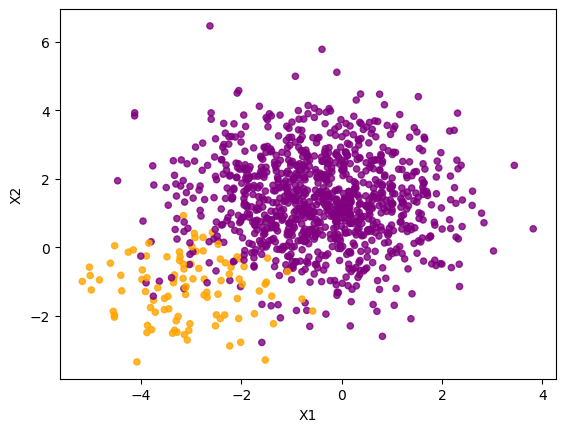

In [3]:
df.plot.scatter(x="X1", y="X2", color=df['y'].map({1: "orange", 0: "purple"}), alpha=0.8)

# Separate features and target
The "y" variable will hold the values we'll eventually try to predict. The "X" variable will hold all the values we can use to make our prediction. Then we'll split the data into training and testing sets.

In [4]:
X = df[["X1", "X2"]]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    random_state=1
                                                    stratify=y)

# Create the model
We'll create the model, fit the model using the training data, and use the model to make predictions on the testing data.

In [5]:
# Create a Logistic Regression Model
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = classifier.predict(X_test)

# Calculate the accuracy of the model
classifier.score(X_test, y_test)

0.9236363636363636

 # Confusion Matrix
 The confusion matrix will allow us to see how our predictions break down by class.

In [6]:
# Create a confusion matrix



array([[ 14,  11],
       [ 10, 240]])

# Interpretation
Our model correctly predicted 254 of 275 test data points. Of the negative class (or "purple" data points), our model correctly predicted 240 points and incorrectly predicted 11. Of the positive class (or "orange" data points), our model correctly predicted 14 and incorrectly predicted 10. 

What information can you gain from this breakdown beyond a simple accuracy score? As just one example, we could say that when our model predicts "purple" it has a 96% chance of being correct (240 correct out of 250 predicted), but when it predicts "orange" it only has a 56% chance of being correct (14 correct out of 25 predicted). What other takeaways can you find?